## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [20]:
# student 1: Tomer - 0263
# student 2:
# student 3:
# student 4:
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [132]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, make_scorer, f1_score, r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import seaborn as sns

In [133]:
# loading the csv's into a dataframe.
df_train = pd.read_csv("C:\\Users\\Ashke\\Downloads\\cancer_train.csv")
df_test = pd.read_csv("C:\\Users\\Ashke\\Downloads\\cancer_test.csv")

In [134]:
# printing first 5 rows of each dataframe.
print("first 5 rows of train CSV : ")
print(df_train.head())
print("first 5 rows of test CSV : ")
print(df_test.head())

first 5 rows of train CSV : 
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       13.170         18.66           85.98      534.6          0.11580   
1        9.667         18.49           61.49      289.1          0.08946   
2       20.090         23.86          134.70     1247.0          0.10800   
3        8.950         15.76           58.74      245.2          0.09462   
4       18.030         16.85          117.50      990.0          0.08947   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.12310         0.12260              0.07340         0.2128   
1           0.06258         0.02948              0.01514         0.2238   
2           0.18380         0.22830              0.12800         0.2249   
3           0.12430         0.09263              0.02308         0.1305   
4           0.12320         0.10900              0.06254         0.1720   

   mean fractal dimension  ...  worst texture  worst perimeter 

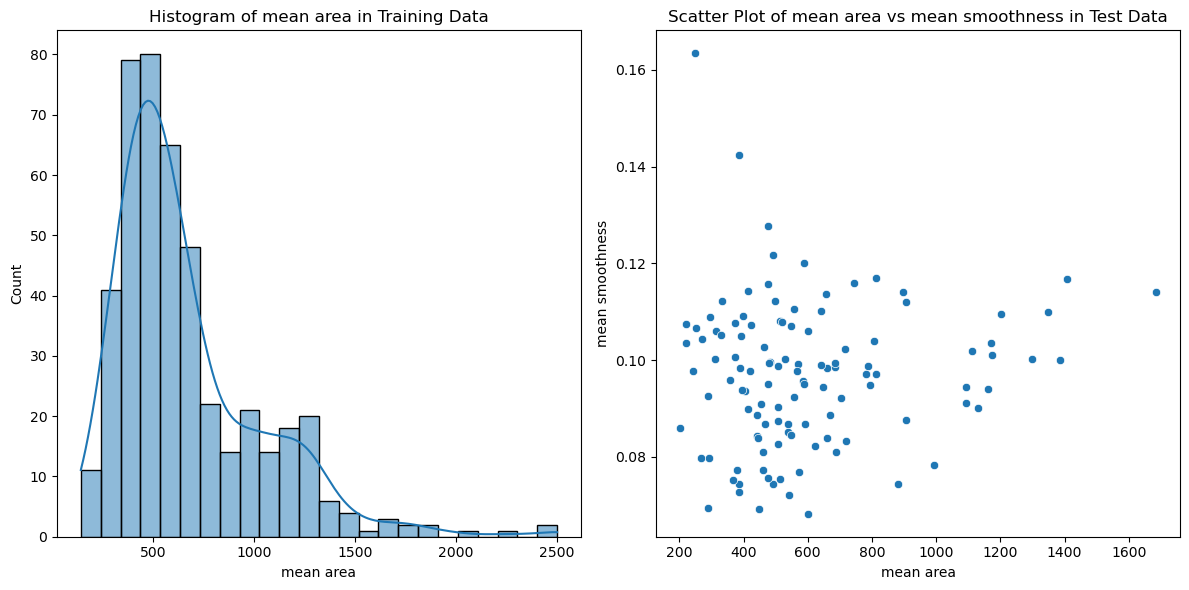

In [135]:
# showing 2 visualizations from training dataset.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_train['mean area'], kde=True)
plt.title('Histogram of mean area in Training Data')
plt.subplot(1, 2, 2)
sns.scatterplot(x='mean area', y='mean smoothness', data=df_test)
plt.title('Scatter Plot of mean area vs mean smoothness in Test Data')
plt.tight_layout()
plt.show()


In [136]:
# showing several tabels split by mean and worst values for train and test datasets seperately.
mean_columns = [
    'mean radius', 'mean texture', 'mean perimeter', 'mean area', 
    'mean smoothness', 'mean compactness', 'mean concavity', 
    'mean concave points', 'mean symmetry', 'mean fractal dimension'
]

worst_columns = [
    'worst radius', 'worst texture', 'worst perimeter', 'worst area', 
    'worst smoothness', 'worst compactness', 'worst concavity', 
    'worst concave points', 'worst symmetry', 'worst fractal dimension', 
    'target'
]

df_mean_train = df_train[mean_columns]
df_worst_train = df_train[worst_columns]

df_mean_test = df_test[mean_columns]
df_worst_test = df_test[worst_columns]

print("Mean Values in Training Data:")
display(df_mean_train.head())

print("Worst Values and Target in Training Data:")
display(df_worst_train.head())

print("Mean Values in Test Data:")
display(df_mean_test.head())

print("Worst Values and Target in Test Data:")
display(df_worst_test.head())


Mean Values in Training Data:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780


Worst Values and Target in Training Data:


,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,15.670,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,11.140,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,23.680,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,9.414,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,20.380,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


Mean Values in Test Data:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200


Worst Values and Target in Test Data:


,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.970,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,16.760,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,22.660,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.964,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,13.860,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [137]:
# using scaling while cross-referencing two params 
# using PCA - Principal Component Analysis to reduce the number of variables in the dataset

numerical_cols = df_train.columns[:-1]  # Exclude the target column
scaler = StandardScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

df_train['perimeter_radius_ratio'] = df_train['mean perimeter'] / df_train['mean radius']
df_train['area_radius_ratio'] = df_train['mean area'] / df_train['mean radius']
df_train['compactness_smoothness_interaction'] = df_train['mean compactness'] * df_train['mean smoothness']

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_train[numerical_cols])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

df_final = pd.concat([df_pca, df_train['target']], axis=1)

In [161]:
# Decision Tree - changing hyperparams : max_depth, min_sample_split, criterion.

X = df_final.drop(columns=['target'])
y = df_final['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(random_state=42)
scorer = make_scorer(f1_score, average='macro')

# Perform 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate
y_pred = grid_search.predict(X_test_scaled)
f1_test = f1_score(y_test, y_pred, average='macro')
print("F1 Score on test set: ", f1_test)

# Create a summary table comparing results
results = pd.DataFrame(grid_search.cv_results_)
relevant_columns = ['param_max_depth', 'param_min_samples_split', 'param_criterion', 'mean_test_score', 'rank_test_score']
summary_table = results[relevant_columns].sort_values(by='rank_test_score').reset_index(drop=True)
print(summary_table)


Best parameters found:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best cross-validation score:  0.9354238485721131
F1 Score on test set:  0.9334146341463414
   param_max_depth param_min_samples_split param_criterion  mean_test_score  \
0               10                       2         entropy         0.935424   
1                5                       2         entropy         0.935424   
2                5                       4         entropy         0.929675   
3                7                       2         entropy         0.929669   
4                5                       6         entropy         0.923754   
5               10                       8         entropy         0.923466   
6                7                       8         entropy         0.923466   
7                5                       8         entropy         0.923466   
8                3                       2            gini         0.923326   
9                3            

In [176]:
#KNN - changing hyperparams : n_neighbors, metric.

X = df_final.drop(columns=['target'])
y = df_final['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grids
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'metric': ['manhattan', 'euclidean', 'minkowski']
}

results = []

# Perform grid search for KNN
for metric in knn_param_grid['metric']:
    for k in knn_param_grid['n_neighbors']:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring=scoring_classification)
        results.append({
            'Model': 'KNN',
            'Metric': metric,
            'Neighbors': k,
            'Mean Score': scores.mean(),
            'Std Deviation': scores.std()
        })

results_df = pd.DataFrame(results)
print(results_df)

# Display the best configuration
best_knn = results_df[results_df['Model'] == 'KNN'].sort_values(by='Mean Score', ascending=False).iloc[0]

print("\nBest KNN Configuration:")
print(best_knn)

knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_param_grid, scoring=scorer, cv=5)
knn_grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print("Best parameters found for KNN: ", knn_grid_search.best_params_)
print("Best cross-validation score for KNN: ", knn_grid_search.best_score_)

# Retrieve the best KNN model from the grid search
best_knn_model = knn_grid_search.best_estimator_

   Model     Metric  Neighbors  Mean Score  Std Deviation
0    KNN  manhattan          1    0.914816       0.032909
1    KNN  manhattan          3    0.931099       0.034498
2    KNN  manhattan          5    0.932195       0.034935
3    KNN  manhattan          7    0.934910       0.025958
4    KNN  manhattan          9    0.937776       0.031899
5    KNN  euclidean          1    0.912068       0.038032
6    KNN  euclidean          3    0.936894       0.032109
7    KNN  euclidean          5    0.934963       0.033728
8    KNN  euclidean          7    0.934650       0.030826
9    KNN  euclidean          9    0.943591       0.036942
10   KNN  minkowski          1    0.912068       0.038032
11   KNN  minkowski          3    0.936894       0.032109
12   KNN  minkowski          5    0.934963       0.033728
13   KNN  minkowski          7    0.934650       0.030826
14   KNN  minkowski          9    0.943591       0.036942

Best KNN Configuration:
Model                  KNN
Metric           euc

In [178]:
# calculating f1 scores for each method.
y_pred_dt = best_dt_model.predict(X_test_scaled)
f1_test_dt = f1_score(y_test, y_pred_dt, average='macro')
print("F1 Score (Decision Tree) on test set: ", f1_test_dt)

y_pred_knn = best_knn_model.predict(X_test_scaled)
f1_test_knn = f1_score(y_test, y_pred_knn, average='macro')
print("F1 Score (KNN) on test set: ", f1_test_knn)

# comparing each f1 score to find the best model.
if f1_test_dt > f1_test_knn:
    final_model = best_dt_model
    print("Selected Model: Decision Tree")
else:
    final_model = best_knn_model
    print("Selected Model: KNN")

# training using the best model found.
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_train_scaled)

F1 Score (Decision Tree) on test set:  0.9334146341463414
F1 Score (KNN) on test set:  0.9336734693877551
Selected Model: KNN


## Part 4 - Apply on test and show model performance estimation

In [180]:
# Predictions on the test set using the final_model.
y_pred_test = final_model.predict(X_test_scaled)

# Evaluate performance.
f1_test = f1_score(y_test, y_pred_test, average='macro')
accuracy_test = accuracy_score(y_test, y_pred_test)

print("F1 Score on test set: ", f1_test)
print("Accuracy on test set: ", accuracy_test)

# Display the classification report.
print(classification_report(y_test, y_pred_test))

# Display the confusion matrix.
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)


F1 Score on test set:  0.9336734693877551
Accuracy on test set:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        44
           1       0.90      0.98      0.94        47

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.94      0.93      0.93        91

Confusion Matrix:
[[39  5]
 [ 1 46]]
